In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\Julaysa\Desktop\Telegram\statistics.xlsx')
data.head(5)

,МеткаВремени,ДатаСообщения,ИдКонтакта,ТекстСообщения,ИдСообщения,ИдСобытия,ДанныеКнопки,КнопкиСообщения,ИзменениеПодписки,История кнопки
0,63782900000000,2022-03-14 18:44:38,875413210,123,1103.0,NaN,NaN,NaN,NaN,Не нажимали
1,63782900000000,2022-03-14 18:44:41,875413210,Отмена,1105.0,NaN,NaN,NaN,NaN,Не нажимали
2,63782900000000,2022-03-14 18:45:34,875413210,С помощью кнопок под этим сообщением выберите ...,1096.0,3.759870e+18,/inline_event 1,"{""inline_keyboard"":[[{""text"":""Мероприятия для ...",NaN,Мероприятия для бухгалтера;Мероприятия для юри...
3,63782900000000,2022-03-14 18:45:34,875413210,С помощью кнопок под этим сообщением выберите ...,1096.0,3.759870e+18,/inline_event 1,"{""inline_keyboard"":[[{""text"":""Мероприятия для ...",NaN,Мероприятия для бухгалтера;Мероприятия для юри...
4,63782900000000,2022-03-14 18:45:35,875413210,С помощью кнопок под этим сообщением выберите ...,1096.0,3.759870e+18,/inline_event 1,"{""inline_keyboard"":[[{""text"":""Мероприятия для ...",NaN,Мероприятия для бухгалтера;Мероприятия для юри...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120690 entries, 0 to 120689
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   МеткаВремени       120690 non-null  int64         
 1   ДатаСообщения      120690 non-null  datetime64[ns]
 2   ИдКонтакта         120690 non-null  int64         
 3   ТекстСообщения     118863 non-null  object        
 4   ИдСообщения        119508 non-null  float64       
 5   ИдСобытия          32073 non-null   float64       
 6   ДанныеКнопки       32073 non-null   object        
 7   КнопкиСообщения    31442 non-null   object        
 8   ИзменениеПодписки  1181 non-null    float64       
 9   История кнопки     120690 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 9.2+ MB


In [4]:
data_new = data[['ДатаСообщения','ТекстСообщения', 'ИзменениеПодписки', 'История кнопки']]
data_new['ГодСообщения'] = data_new['ДатаСообщения'].dt.year
data_new['МесяцСообщения'] = data_new['ДатаСообщения'].dt.month
data_new['ДеньНеделиСообщения'] = data_new['ДатаСообщения'].dt.dayofweek
data_new.head(5)

<ipython-input-4-f396e285c0e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['ГодСообщения'] = data_new['ДатаСообщения'].dt.year
<ipython-input-4-f396e285c0e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['МесяцСообщения'] = data_new['ДатаСообщения'].dt.month
<ipython-input-4-f396e285c0e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,ДатаСообщения,ТекстСообщения,ИзменениеПодписки,История кнопки,ГодСообщения,МесяцСообщения,ДеньНеделиСообщения
0,2022-03-14 18:44:38,123,NaN,Не нажимали,2022,3,0
1,2022-03-14 18:44:41,Отмена,NaN,Не нажимали,2022,3,0
2,2022-03-14 18:45:34,С помощью кнопок под этим сообщением выберите ...,NaN,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0
3,2022-03-14 18:45:34,С помощью кнопок под этим сообщением выберите ...,NaN,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0
4,2022-03-14 18:45:35,С помощью кнопок под этим сообщением выберите ...,NaN,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0


In [5]:
date_start=min(data_new['ДатаСообщения'])
date_stop=max(data_new['ДатаСообщения'])
print(f'Период рассылки от {date_start} до {date_stop}')

Период рассылки от 2022-03-14 18:44:38 до 2023-05-03 16:35:52


In [6]:
def alert(row):
    if row['ИзменениеПодписки']==1:
        return 'Подписался'
    elif row['ИзменениеПодписки']==-1:
        return 'Отписался'
    else:
        return 'НетИзменения'

data_new['ИзменениеПодписки'] = data_new.apply(alert, axis=1)

<ipython-input-6-90f8088438bd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['ИзменениеПодписки'] = data_new.apply(alert, axis=1)


In [27]:
d=data_new.groupby(['ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['ИзменениеПодписки'], ascending=False)
# Подписки,отписки, нет изменения за Период рассылки от 2022-03-14 18:44:38 до 2023-05-03 16:35:52
d

,ИзменениеПодписки,Количество
2,Подписался,229
1,Отписался,952
0,НетИзменения,119509


In [26]:
filtered_df = data_new[data_new['ТекстСообщения'].isnull()] \
.groupby(['ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
filtered_df
# Текст сообщения Nun

,ИзменениеПодписки,Количество
0,НетИзменения,646
1,Отписался,952
2,Подписался,229


Вывод:
- Отписались и подписались те пользователи, у которых текст сообщения пустой

In [28]:
d_2023=data_new[data_new['ГодСообщения']==2023] \
.groupby(['ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['ИзменениеПодписки'], ascending=False)
# Подписки,отписки, нет изменения за 2023 год
d_2023

,ИзменениеПодписки,Количество
2,Подписался,60
1,Отписался,253
0,НетИзменения,36539


In [29]:
d_2022=data_new[data_new['ГодСообщения']==2022] \
.groupby(['ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['ИзменениеПодписки'], ascending=False)
# Подписки,отписки, нет изменения за 2022 год
d_2022

,ИзменениеПодписки,Количество
2,Подписался,169
1,Отписался,699
0,НетИзменения,82970


In [30]:
mail_count_date=data_new.groupby(['ГодСообщения','МесяцСообщения','ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['ГодСообщения','МесяцСообщения','ИзменениеПодписки'], ascending=False)
mail_count_date
# Подписки, отписки, нетИзменения- по году, месяцу

,ГодСообщения,МесяцСообщения,ИзменениеПодписки,Количество
44,2023,5,Подписался,1
43,2023,5,Отписался,4
42,2023,5,НетИзменения,788
41,2023,4,Подписался,6
40,2023,4,Отписался,51
39,2023,4,НетИзменения,8338
38,2023,3,Подписался,21
37,2023,3,Отписался,56
36,2023,3,НетИзменения,10982
35,2023,2,Подписался,18


# Статистика за 2023 год

In [35]:
data_new_2023=data_new[data_new['ГодСообщения']==2023]
data_new_2023.head()

,ДатаСообщения,ТекстСообщения,ИзменениеПодписки,История кнопки,ГодСообщения,МесяцСообщения,ДеньНеделиСообщения
2330,2023-01-31 20:18:13,Й,НетИзменения,Не нажимали,2023,1,1
2331,2023-01-31 20:18:18,"Нажмите, что вас интересует?",НетИзменения,Задать вопрос по 1С;Купить 1С;Записаться на бе...,2023,1,1
2332,2023-01-31 20:18:22,Цу,НетИзменения,Не нажимали,2023,1,1
2333,2023-01-31 20:18:26,У,НетИзменения,Не нажимали,2023,1,1
2334,2023-03-01 21:38:20,"Вот сюда ссылка пришла, а в желтый нет",НетИзменения,Не нажимали,2023,3,2


In [36]:
data_new_2023_count=data_new_2023.groupby(['МесяцСообщения','ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['МесяцСообщения','ИзменениеПодписки'], ascending=False)
data_new_2023_count

,МесяцСообщения,ИзменениеПодписки,Количество
14,5,Подписался,1
13,5,Отписался,4
12,5,НетИзменения,788
11,4,Подписался,6
10,4,Отписался,51
9,4,НетИзменения,8338
8,3,Подписался,21
7,3,Отписался,56
6,3,НетИзменения,10982
5,2,Подписался,18


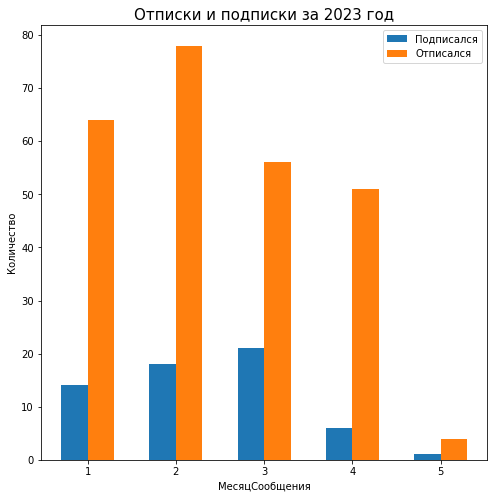

In [37]:
plt.figure(figsize=(8, 8))
width = 0.30

plt.bar(data_new_2023_count['МесяцСообщения'][data_new_2023_count['ИзменениеПодписки']=='Подписался']-0.15, 
        data_new_2023_count['Количество'][data_new_2023_count['ИзменениеПодписки']=='Подписался'], width, label='Подписался')

plt.bar(data_new_2023_count['МесяцСообщения'][data_new_2023_count['ИзменениеПодписки']=='Отписался']+0.15, 
        data_new_2023_count['Количество'][data_new_2023_count['ИзменениеПодписки']=='Отписался'], width, label='Отписался')

# plt.bar(data_new_2023_count['МесяцСообщения'][data_new_2023_count['ИзменениеПодписки']=='НетИзменения']-0.30, 
#         data_new_2023_count['Количество'][data_new_2023_count['ИзменениеПодписки']=='НетИзменения'], width, label='НетИзменения')

plt.title('Отписки и подписки за 2023 год', fontsize=15)
plt.xlabel("МесяцСообщения")
plt.ylabel("Количество")
# plt.legend(["Подписался", "Отписался","НетИзменения"])
plt.legend(["Подписался", "Отписался"])
plt.show()

# Статистика за 2022 год

In [38]:
data_new_2022=data_new[data_new['ГодСообщения']==2022]
data_new_2022.head()

,ДатаСообщения,ТекстСообщения,ИзменениеПодписки,История кнопки,ГодСообщения,МесяцСообщения,ДеньНеделиСообщения
0,2022-03-14 18:44:38,123,НетИзменения,Не нажимали,2022,3,0
1,2022-03-14 18:44:41,Отмена,НетИзменения,Не нажимали,2022,3,0
2,2022-03-14 18:45:34,С помощью кнопок под этим сообщением выберите ...,НетИзменения,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0
3,2022-03-14 18:45:34,С помощью кнопок под этим сообщением выберите ...,НетИзменения,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0
4,2022-03-14 18:45:35,С помощью кнопок под этим сообщением выберите ...,НетИзменения,Мероприятия для бухгалтера;Мероприятия для юри...,2022,3,0


In [39]:
data_new_2022_count=data_new_2022.groupby(['МесяцСообщения','ИзменениеПодписки'],as_index=False) \
.aggregate({'История кнопки':"count"}) \
.rename(columns={"История кнопки":"Количество"}) \
.sort_values(by=['МесяцСообщения','ИзменениеПодписки'], ascending=False)
data_new_2022_count

,МесяцСообщения,ИзменениеПодписки,Количество
29,12,Подписался,6
28,12,Отписался,59
27,12,НетИзменения,7759
26,11,Подписался,20
25,11,Отписался,78
24,11,НетИзменения,8950
23,10,Подписался,12
22,10,Отписался,84
21,10,НетИзменения,8210
20,9,Подписался,9


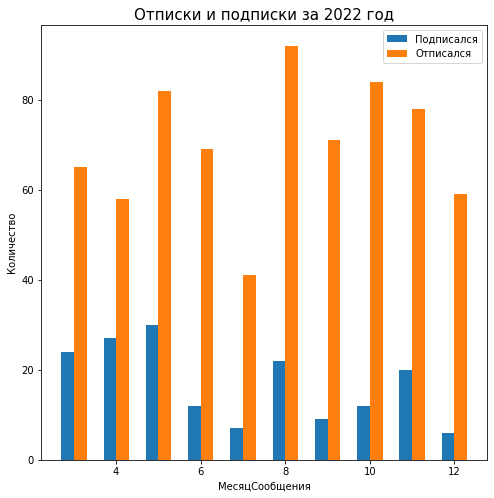

In [40]:
plt.figure(figsize=(8, 8))
width = 0.30

plt.bar(data_new_2022_count['МесяцСообщения'][data_new_2022_count['ИзменениеПодписки']=='Подписался']-0.15, 
        data_new_2022_count['Количество'][data_new_2022_count['ИзменениеПодписки']=='Подписался'], width, label='Подписался')

plt.bar(data_new_2022_count['МесяцСообщения'][data_new_2022_count['ИзменениеПодписки']=='Отписался']+0.15, 
        data_new_2022_count['Количество'][data_new_2022_count['ИзменениеПодписки']=='Отписался'], width, label='Отписался')

# plt.bar(data_new_2022_count['МесяцСообщения'][data_new_2022_count['ИзменениеПодписки']=='НетИзменения']-0.30, 
#         data_new_2022_count['Количество'][data_new_2022_count['ИзменениеПодписки']=='НетИзменения'], width, label='НетИзменения')

plt.title('Отписки и подписки за 2022 год', fontsize=15)
plt.xlabel("МесяцСообщения")
plt.ylabel("Количество")
# plt.legend(["Подписался", "Отписался","НетИзменения"])
plt.legend(["Подписался", "Отписался"])
plt.show()